# ESSC4510/ EASC5510 
## Linear Model Black Rock Forest Dataset

The following tutorial introduce the practical usage of python in solving linear model problems, including

 1) Parameterizing data kernal G
 
 2) solving estimated model parameters $m^{est}$
 
 3) Computing the covariance of the model parameters
 
Date: 24/02/2021


In [1]:
# import required packages
import os; from datetime import date; import numpy as np
from math import exp, pi, sin, sqrt, floor, ceil
import scipy.linalg as la
from matplotlib import pyplot as plt; import matplotlib.cm as cm ; from matplotlib.colors import ListedColormap

# and the plotting function
def eda_draw(*argv):
    bw = np.zeros((256,4));
    v = 0.9*(256 - np.linspace( 0, 255, 256 ))/255;
    bw[:,0], bw[:,1], bw[:,2], bw[:,3] = v, v, v, np.ones(256);
    bwcmap = ListedColormap(bw);
    # size of plot
    W = 16; H = 4;
    fig1 = plt.figure(1);
    # figsize width and height in inches
    fig1.set_size_inches(W,H);
    ax1 = plt.subplot(1,1,1);
    plt.axis([0, W, -H/2, H/2]);
    plt.axis('off');
    LM = W/6;    # matrix width and heoght
    LV = W/40;   # vector width
    FS = 0.12;    # character width
    TO = 0.4;    # title vertical offset
    SP = 0.2;    # space between objects
    LS = 0.2;    # leading space
    p = LS; # starting x-position
    istitle=0; # flags presence of a title
    for a in argv:
        if isinstance(a,np.ndarray):
            sh = np.shape(a);
            if len(sh) == 1:  # conversion to nx1 array
                n = sh[0];
                m = 1;
                ap = a;
                a = np.zeros((n,1));
                a[:,0] = ap;
            else:
                n = sh[0]; m = sh[1];
            if m==1:
                pold=p;
                left=p; right=p+LV; bottom=-LM/2; top=LM/2;
                plt.imshow( a, cmap=bwcmap, vmin=np.min(a), vmax=np.max(a), extent=(left,right,bottom,top) );
                p = p+LV; pm = (p+pold)/2;
                if istitle:
                    plt.text(pm,-(LM/2)-TO,titlestr,horizontalalignment='center');
                    istitle=0;
                p = p+SP;
            else:
                pold=p; left=p; right=p+LM; bottom=-LM/2; top=LM/2;
                plt.imshow( a, cmap=bwcmap, vmin=np.min(a), vmax=np.max(a), extent=(left,right,bottom,top) );
                p = p+LM; pm = (p+pold)/2;
                if istitle:
                    plt.text(pm,-(LM/2)-TO,titlestr,horizontalalignment='center');
                    istitle=0;
                p = p+SP;
        elif isinstance(a,str):
            ns = len(a);
            istitle=0;
            if( ns>=6 ):
                if 'title ' in a[0:6]:
                    istitle=1;
                    titlestr=a[6:];
            if( istitle != 1):
                plt.text(p,0,a);
                p = p + ns*FS + SP;
    plt.show();
    return 1;

### 1.0 Load and plot the data
First let us have a glimsp of what the data we are having

-- data/brf_temp.txt

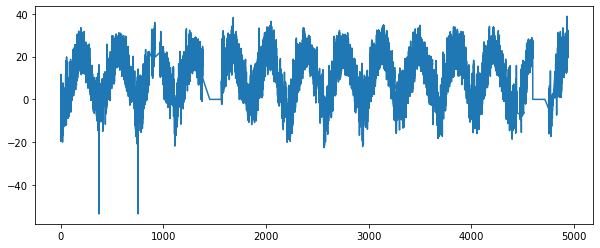

In [10]:
Data = np.genfromtxt('data/brf_temp.txt',delimiter='\t')

# Visualize the data


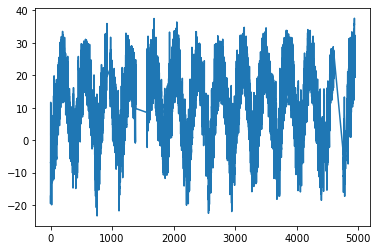

In [21]:
# subset data
k = np.where((Data[:,1]!=0) &(Data[:,1]>-40)&(Data[:,1]<38))
(K, N) = np.shape(k) 
t = np.zeros((N,1))
t[:,0] = Data[k,0].ravel()
dobs = np.zeros((N,1))
dobs[:,0] = Data[k,1].ravel()

# plot after the subset


### 1.1 Create a data kernal

Here consider a most simpified case where we only consider the annual variaions of the forest temperature

The data kernal G has shape of (N,M), where M is the number of model parameters.

In our case, we have four model parameters, which are 

    1) constant
    2) linear trend
    3) sine with period of a year
    4) cosine with period of a year
    
Here please write down the explicit form of d and m, e.g. 
$$ d_i = A m_1 + B m_2 + C m_3 + D m_4$$
and what are A,B,C and D?

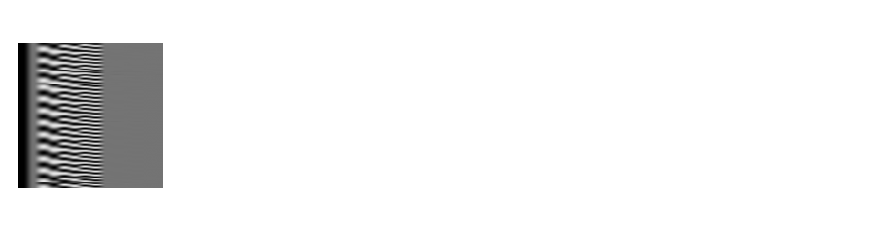

1

In [48]:
Ty = 
M= 
G = np.zeros((N,M));
G[:,0] = 
G[:,1] = 
G[:,2] =
G[:,3] = 


#eda_draw(G)

### 1.2 Least sqaure inversion 
$$ m^{est} = [G^TG]^{-1}G^T d^{obs}$$


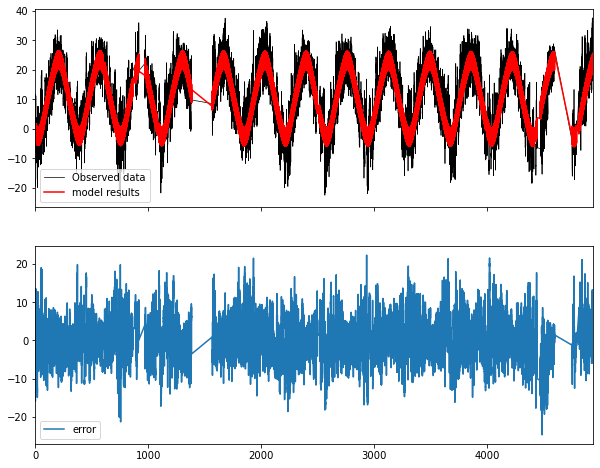

In [41]:
# Least square
GTG = 
mest = 
# calculate d_pred and error
dpre =   # Predict data
e =              # error
E =        # Total Error

# plot the model results
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,8),sharex=True)
ax[0].plot(t,dobs, label='Observed data', color='k',linewidth=0.7)
ax[0].plot(t, dpre, label='model results', color='red')
ax[0].set_xlim(min(t),max(t))
ax[0].legend()
ax[1].plot(t,e, label='error')
ax[1].legend()


### 1.3 Model variance
Posterior variance of data
$$ \sigma_d^2 = \frac{E}{(N-M)}$$
Model covarience
$$ C_m = \sigma_d^2[G^TG]^{-1}$$

In [46]:
sigma_d2 =           # posterior data variance 
Cm =    # variance of model parameters

sigma_m = []
for i in range(M):
    sigma_m.append(   ) # sqrt variance of model parameter

# write out slope and its confidence
slopestr1 = "slope %.3e ± %.3e  ºC per day (95%%)" % (mest[1,0], sigma_m[1]);
print(slopestr1);

# convert to per year
slopestr2 = "slope %.3e ± %.3e  ºC per year (95%%)" % (Ty*mest[1,0], Ty*sigma_m[1]);
print(slopestr2);

slope -8.698e-05 ± 1.164e-05  ºC per day (95%)
slope -3.177e-02 ± 4.250e-03  ºC per year (95%)
